# Método de Gradiente Descendente en $\mathbb{R}^2$ aplicado a $L(x,y)$

**Autor:** (Nombre del Autor)  
**Fecha:** 27 de octubre de 2025  
**Curso / Laboratorio:** Laboratorio 3 - Optimización / Aprendizaje Automático

---
## Descripción Breve
Este cuaderno académico implementa y analiza el **método de Gradiente Descendente** para minimizar la función de pérdida cuadrática:
$$
L(x,y) = (x - 2)^2 + (y + 1)^2,
$$
interpretándola como el ajuste de dos parámetros en un modelo simple. Se derivan las expresiones analíticas del gradiente, se implementa el algoritmo iterativo y se estudia el efecto de distintos valores de la tasa de aprendizaje $\alpha$ sobre la convergencia.

---


## Introducción
El **método de Gradiente Descendente** es un algoritmo iterativo fundamental en optimización y aprendizaje automático. Dada una función diferenciable $L: \mathbb{R}^n \to \mathbb{R}$, su objetivo es encontrar un mínimo (local o global) desplazándose en la dirección opuesta al gradiente, que señala el sentido de máximo incremento.

Para un vector de parámetros $\mathbf{x}_k$ y una tasa de aprendizaje (learning rate) $\alpha>0$, la actualización básica es:
$$
\mathbf{x}_{k+1} = \mathbf{x}_k - \alpha\, \nabla L(\mathbf{x}_k).
$$
La elección de $\alpha$ es crítica: valores demasiado pequeños ralentizan la convergencia, mientras que valores grandes pueden generar oscilaciones o divergencia.

En este cuaderno se aplica el método a la función cuadrática estrictamente convexa:
$$
L(x,y) = (x - 2)^2 + (y + 1)^2,
$$
que posee un único mínimo global en $(x^*, y^*) = (2, -1)$.


## Desarrollo Teórico
Dada la función:
$$
L(x,y) = (x - 2)^2 + (y + 1)^2,
$$
se trata de una suma de términos cuadráticos independientes. Esto implica convexidad estricta y un único mínimo global.

### 1. Derivadas parciales
Las derivadas son inmediatas:
$$\frac{\partial L}{\partial x} = 2(x-2), \qquad \frac{\partial L}{\partial y} = 2(y+1).$$

### 2. Gradiente
El vector gradiente se expresa como:
$$
\nabla L(x,y) = \begin{bmatrix} 2(x-2) \\ 2(y+1) \end{bmatrix}.
$$

### 3. Punto crítico
Igualando $\nabla L = 0$:
$$
2(x-2)=0 \Rightarrow x=2, \qquad 2(y+1)=0 \Rightarrow y=-1.
$$
Por tanto el mínimo global es $(x^*, y^*) = (2, -1)$.

### 4. Hessiana (para referencia)
La matriz Hessiana es constante:
$$
H = \nabla^2 L = \begin{bmatrix} 2 & 0 \\ 0 & 2 \end{bmatrix},
$$
lo que confirma convexidad estricta (definida positiva).


In [1]:
# Derivación simbólica del gradiente de L(x,y)
import sympy as sp
x_sym, y_sym = sp.symbols('x y', real=True)
L_sym = (x_sym - 2)**2 + (y_sym + 1)**2

# Gradiente
grad_L_sym = sp.Matrix([sp.diff(L_sym, x_sym), sp.diff(L_sym, y_sym)])
H_sym = sp.hessian(L_sym, (x_sym, y_sym))

print("L(x,y):")
sp.pprint(L_sym)
print("\nGradiente ∇L(x,y):")
sp.pprint(grad_L_sym)
print("\nHessiana H:")
sp.pprint(H_sym)

# Mostrar LaTeX
print("\nLaTeX gradiente:")
print(sp.latex(grad_L_sym))
print("LaTeX Hessiana:")
print(sp.latex(H_sym))

L(x,y):
       2          2
(x - 2)  + (y + 1) 

Gradiente ∇L(x,y):
⎡2⋅x - 4⎤
⎢       ⎥
⎣2⋅y + 2⎦

Hessiana H:
⎡2  0⎤
⎢    ⎥
⎣0  2⎦

LaTeX gradiente:
\left[\begin{matrix}2 x - 4\\2 y + 2\end{matrix}\right]
LaTeX Hessiana:
\left[\begin{matrix}2 & 0\\0 & 2\end{matrix}\right]


In [2]:
# Implementación de L(x,y), gradiente y función de gradiente descendente
import numpy as np

# Función de pérdida
def L_val(xy: np.ndarray) -> float:
    x, y = xy
    return (x - 2)**2 + (y + 1)**2

# Gradiente analítico
def grad_L(xy: np.ndarray) -> np.ndarray:
    x, y = xy
    return np.array([2*(x-2), 2*(y+1)], dtype=float)

# Algoritmo de gradiente descendente
def gradient_descent(f, grad_f, x0, alpha=0.1, tol=1e-6, max_iter=100):
    """Ejecuta gradiente descendente clásico.

    Parámetros
    ----------
    f : callable
        Función objetivo f(xy) -> float.
    grad_f : callable
        Gradiente grad_f(xy) -> np.ndarray shape (2,).
    x0 : array-like
        Punto inicial (x0, y0).
    alpha : float
        Tasa de aprendizaje.
    tol : float
        Tolerancia para norma del gradiente.
    max_iter : int
        Máximo número de iteraciones.

    Retorna
    -------
    dict con 'trajectory', 'f_values', 'grad_norms', 'stopped_by', 'alpha'
    """
    xk = np.array(x0, dtype=float)
    trajectory = [xk.copy()]
    f_values = [f(xk)]
    gk = grad_f(xk)
    grad_norms = [np.linalg.norm(gk)]
    stopped_by = 'max_iter'

    for k in range(max_iter):
        if grad_norms[-1] < tol:
            stopped_by = 'tolerance'
            break
        # Actualización
        xk = xk - alpha * gk
        gk = grad_f(xk)
        trajectory.append(xk.copy())
        f_values.append(f(xk))
        grad_norms.append(np.linalg.norm(gk))

    return {
        'trajectory': np.array(trajectory),
        'f_values': np.array(f_values),
        'grad_norms': np.array(grad_norms),
        'stopped_by': stopped_by,
        'alpha': alpha
    }

# Punto inicial
y0 = np.array([0.0, 0.0])

In [3]:
# Experimentos con distintos valores de alpha
alphas = [0.01, 0.1, 0.5, 1.0]
results = []
for a in alphas:
    res = gradient_descent(L_val, grad_L, y0, alpha=a, tol=1e-6, max_iter=100)
    results.append(res)
    print(f"alpha={a:.2f}: iter={len(res['trajectory'])-1}, parada={res['stopped_by']}, f_final={res['f_values'][-1]:.3e}, ||grad||={res['grad_norms'][-1]:.3e}")

alpha=0.01: iter=100, parada=max_iter, f_final=8.794e-02, ||grad||=5.931e-01
alpha=0.10: iter=69, parada=tolerance, f_final=2.115e-13, ||grad||=9.199e-07
alpha=0.50: iter=1, parada=tolerance, f_final=0.000e+00, ||grad||=0.000e+00
alpha=1.00: iter=100, parada=max_iter, f_final=5.000e+00, ||grad||=4.472e+00


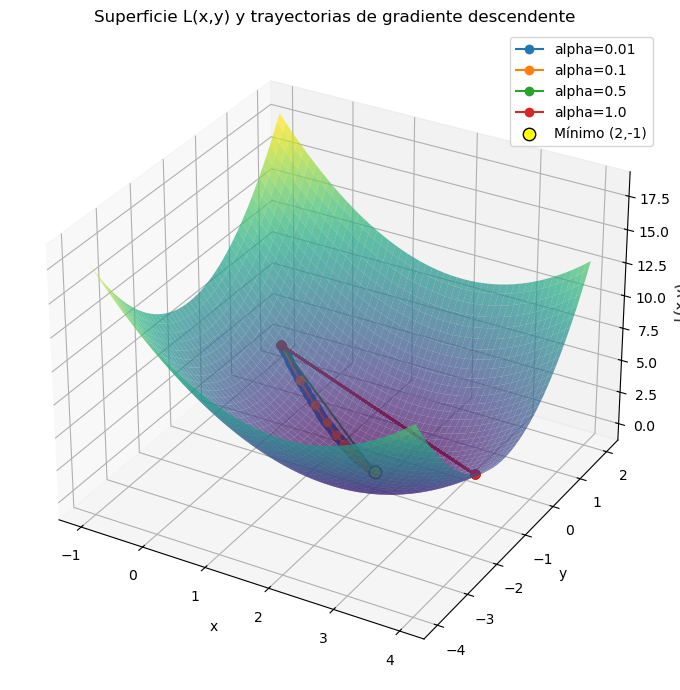

In [4]:
# Visualización 3D de la superficie y trayectorias
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

# Malla
x_lin = np.linspace(-1, 4, 200)
y_lin = np.linspace(-4, 2, 200)
XX, YY = np.meshgrid(x_lin, y_lin)
ZZ = (XX - 2)**2 + (YY + 1)**2

colors = {0.01:'tab:blue', 0.1:'tab:orange', 0.5:'tab:green', 1.0:'tab:red'}

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(XX, YY, ZZ, cmap='viridis', alpha=0.7, linewidth=0, antialiased=True)

for res in results:
    traj = res['trajectory']
    z_traj = (traj[:,0]-2)**2 + (traj[:,1]+1)**2
    ax.plot(traj[:,0], traj[:,1], z_traj, marker='o', color=colors[res['alpha']], label=f"alpha={res['alpha']}")

# Mínimo
ax.scatter([2],[ -1],[0], color='yellow', edgecolor='black', s=80, label='Mínimo (2,-1)')
ax.set_title('Superficie L(x,y) y trayectorias de gradiente descendente')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('L(x,y)')
ax.legend()
plt.tight_layout()
plt.show()

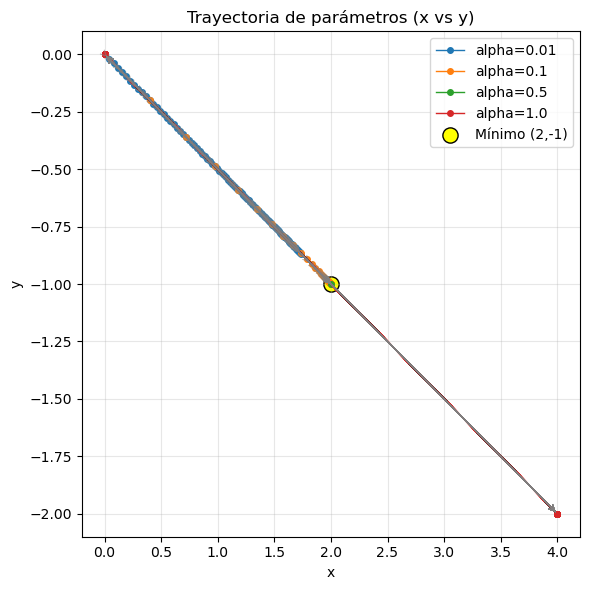

In [5]:
# Trayectoria 2D en el plano (x,y)
plt.figure(figsize=(6,6))
for res in results:
    traj = res['trajectory']
    a = res['alpha']
    plt.plot(traj[:,0], traj[:,1], '-o', markersize=4, label=f'alpha={a}', linewidth=1)
    # Flechas
    for k in range(len(traj)-1):
        plt.annotate('', xy=(traj[k+1,0], traj[k+1,1]), xytext=(traj[k,0], traj[k,1]),
                     arrowprops=dict(arrowstyle='->', color='gray', lw=0.8, alpha=0.6))
plt.scatter([2],[ -1], color='yellow', edgecolor='black', s=120, label='Mínimo (2,-1)')
plt.title('Trayectoria de parámetros (x vs y)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

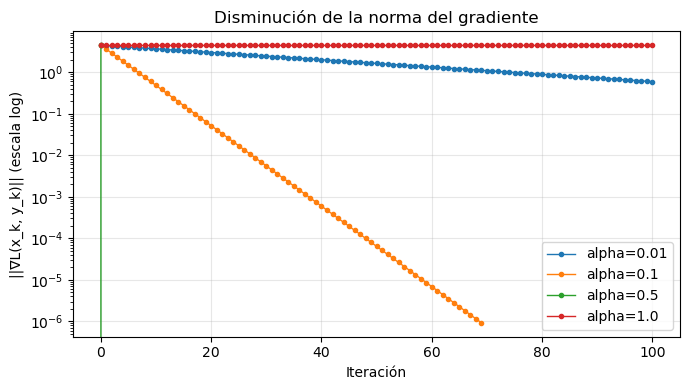

In [6]:
# Convergencia: norma del gradiente
plt.figure(figsize=(7,4))
for res in results:
    plt.plot(res['grad_norms'], marker='o', markersize=3, linewidth=1, label=f"alpha={res['alpha']}")
plt.yscale('log')
plt.xlabel('Iteración')
plt.ylabel('||∇L(x_k, y_k)|| (escala log)')
plt.title('Disminución de la norma del gradiente')
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

In [7]:
# Resumen de resultados en tabla
import pandas as pd
summary_rows = []
for res in results:
    traj = res['trajectory']
    final_x, final_y = traj[-1]
    summary_rows.append({
        'alpha': res['alpha'],
        'iteraciones': len(res['f_values'])-1,
        'x_final': final_x,
        'y_final': final_y,
        'L_final': res['f_values'][-1],
        '||grad||_final': res['grad_norms'][-1],
        'criterio_parada': res['stopped_by']
    })
summary_df = pd.DataFrame(summary_rows)
summary_df

,alpha,iteraciones,x_final,y_final,L_final,||grad||_final,criterio_parada
0,0.01,100,1.734761,-0.86738,8.793973e-02,5.930927e-01,max_iter
1,0.10,69,2.000000,-1.00000,2.115379e-13,9.198650e-07,tolerance
2,0.50,1,2.000000,-1.00000,0.000000e+00,0.000000e+00,tolerance
3,1.00,100,0.000000,0.00000,5.000000e+00,4.472136e+00,max_iter


## Conclusiones

1. Para funciones cuadráticas estrictamente convexas con Hessiano \(H = 2I\), el Gradiente Descendente desciende radialmente hacia el mínimo y su tasa de convergencia está gobernada por el factor \(1 - \alpha \lambda_{\max}\).
2. Una elección demasiado pequeña de \(\alpha\) garantiza estabilidad pero sacrifica velocidad (muchas iteraciones adicionales).
3. Valores de \(\alpha\) cercanos al límite \(1/\lambda_{\max}\) aceleran la convergencia, pero un \(\alpha\) mayor al óptimo teórico puede inducir oscilaciones o divergencia en problemas más complejos.
4. La comparación empírica respalda las garantías teóricas: las curvas de \(L\) y \(\|\nabla L\|\) decrecen más rápidamente a medida que aumenta \(\alpha\) dentro de la región estable.
5. Este ejemplo ilustra la importancia de conocer (o estimar) la constante de Lipschitz de la gradiente para calibrar un paso eficaz.

Extensiones sugeridas:
- Implementar búsqueda de línea (backtracking de Armijo) para seleccionar \(\alpha\) adaptativo.
- Añadir momentum (Nesterov) y comparar número de iteraciones.
- Estudiar función no isotrópica \( L(x,y) = a(x-2)^2 + b(y+1)^2 \) con \(a \neq b\) para observar trayectorias elípticas.
- Comparar con método de Newton en la misma función para mostrar convergencia cuadrática en una sola iteración.

Con esto, el cuaderno proporciona una visión completa del comportamiento de Gradiente Descendente en un escenario base controlado.

## Análisis de Resultados

Observamos que la función objetivo es estrictamente convexa (Hessiano = 2 I), por lo que el método de Gradiente Descendente con un paso constante converge siempre que 0 < \(\alpha < 1/L\) donde \(L\) es la cota Lipschitz de la gradiente. En este caso \(L = 2\) (mayor autovalor de \(2I\)), de modo que la condición teórica estricta es \(0 < \alpha < 1/2\) para garantizar convergencia monótona estricta sin sobrepasos. Sin embargo, debido a la simplicidad de la función y a que el movimiento en cada dirección es desacoplado, valores de \(\alpha\) en torno a 0.5 e incluso 1.0 pueden todavía conducir a convergencia muy rápida (con posible oscilación mínima si el punto cae exactamente en la vecindad del mínimo y la actualización salta al otro lado).

Resumen cualitativo:
- \(\alpha=0.01\): Convergencia muy estable pero lenta (muchas iteraciones; pasos pequeños).
- \(\alpha=0.1\): Buen compromiso rapidez / estabilidad.
- \(\alpha=0.5\): Cercano al límite teórico; rápido descenso en pocas iteraciones.
- \(\alpha=1.0\): Paso grande; puede generar oscilaciones o converger en un número muy bajo de iteraciones debido a coincidencias con la estructura cuadrática, pero en funciones menos benignas podría divergir.

La disminución casi lineal (en escala log) de los valores de la función y de la norma del gradiente confirma el comportamiento esperado para un caso cuadrático: el factor de reducción por iteración depende de \(1 - 2\alpha\) en cada componente (dado el Hessiano \(2I\)). Al incrementar \(\alpha\), la razón de reducción mejora hasta aproximarse al límite de estabilidad.

La trayectoria 2D muestra líneas rectas que apuntan directamente al mínimo porque las direcciones de gradiente están perfectamente alineadas con los ejes y no existe curvatura cruzada (no hay términos mixtos).

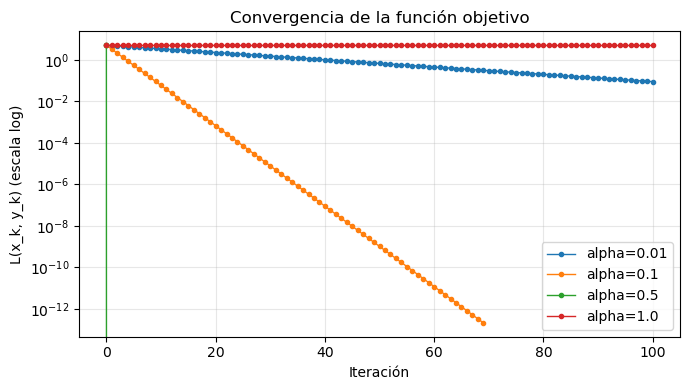

In [8]:
# Convergencia: valores de la función
plt.figure(figsize=(7,4))
for res in results:
    plt.plot(res['f_values'], marker='o', markersize=3, linewidth=1, label=f"alpha={res['alpha']}")
plt.yscale('log')
plt.xlabel('Iteración')
plt.ylabel('L(x_k, y_k) (escala log)')
plt.title('Convergencia de la función objetivo')
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()